<a href="https://colab.research.google.com/github/namtoptall/DataScience/blob/main/NPL_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xử lý ngôn ngữ tự nhiên (NLP) với TensorFlow


# Những điều chúng ta sẽ tìm hiểu

* Download tập dữ liệu text
* Trực quan hóa dữ liệu text
* Chuyển text thành các con số, sử dụng tokenization
* Biến text được mã hóa thành embedding
* Lập mô hình tập dữ liệu text
  * Bắt đầu với baseline (TF-IDF)
  * Xây dựng một số mô hình deep learning text
    * Dense, LSTM, GRU, Conv1D, Transfer learning
* So sánh chất lượng của từng mô hình
* Kết hợp các mô hình thành ensemble model
* Lưu và load mô hình đã huấn luyện
* Tìm ra những dự đoán sai nhất


In [1]:
!nvidia-smi

Mon Jul 29 07:30:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# download support function script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-29 07:31:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-29 07:31:12 (97.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [4]:
# Download dữ liệu (tương tự từ Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Giải nén dữ liệu
unzip_data("nlp_getting_started.zip")

--2024-07-29 07:32:01--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2024-07-29 07:32:01 (104 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [6]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
# shuffle the training dataframe
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('keyword').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 137 (\x89) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='id', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['location'].value_counts()
    for x_label, grp in _df_8.groupby('keyword')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('keyword')
_ = plt.ylabel('location')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 137 (\x89) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_9.groupby('location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('location')
_ = plt.ylabel('text')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['keyword'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='id', y='keyword', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='id', y='location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 137 (\x89) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='id', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['keyword'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='target', y='keyword', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_17.groupby('keyword').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 137 (\x89) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='index', y='id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='id', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['location'].value_counts()
    for x_label, grp in _df_25.groupby('keyword')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('keyword')
_ = plt.ylabel('location')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 137 (\x89) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_26.groupby('location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('location')
_ = plt.ylabel('text')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['keyword'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='index', y='keyword', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='index', y='location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 137 (\x89) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='index', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['keyword'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='id', y='keyword', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [10]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
train_df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [12]:
# Có tổng cộng bao nhiêu mẫu?
print(f"Total training samples : {len(train_df)}")
print(f"Total test samples : {len(test_df)}")
print(f"Total samples : {len(train_df) + len(test_df)}")

Total training samples : 7613
Total test samples : 3263
Total samples : 10876


In [13]:
#random samples
import random
random_index = random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target = row
  print(f"Target : {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text : \n{text}\n")
  print("---\n")

Target : 0 (not real disaster)
Text : 
I entered to #win the ENTIRE set of butterLONDON Lip Crayons via @be_ram0s. - Go enter! #bbloggers http://t.co/DsB3lDfuxU

---

Target : 0 (not real disaster)
Text : 
HAPPY 24 TWISTER!!! Thank you for all the laughs sticking by my side no matter what and also forÛ_ https://t.co/ttq9IlHp8W

---

Target : 0 (not real disaster)
Text : 
Kenya News (Chelsea talisman Eden Hazard keen to match Cristiano Ronaldo and Lionel Messi.)  Mipasho http://t.co/LxvLqVbc8r

---

Target : 0 (not real disaster)
Text : 
When you lowkey already know you're gonna drown in school this year :) http://t.co/aCMrm833zq

---

Target : 1 (real disaster)
Text : 
Refugio oil spill may have been costlier bigger than projected http://t.co/lzob8qOH1B

---



In [14]:
from sklearn.model_selection import train_test_split

# using train_test_split to split the dataset into train and test
train_sentences,val_sentences,train_labels,val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                        train_df_shuffled["target"].to_numpy(),
                                                                        test_size=0.1, # 10% test size
                                                                        random_state=42) # set random state for reproducibility

In [15]:
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [16]:
# view the first 10 sentences
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [17]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorize = TextVectorization(max_tokens=None,
                                   standardize='lower_and_strip_punctuation',
                                   split='whitespace',
                                   ngrams=None,
                                   output_mode='int',
                                   output_sequence_length=None)

Chúng ta đã khởi tạo đối tượng `TextVectorization` với thiết lập mặc định nhưng hãy tùy chỉnh nó một chút cho trường hợp này.

Cụ thể, hãy thiết lập giá trị cho `max_tokens` và `output_sequence_length`.

Với `max_tokens` (số từ trong từ vựng), bội số của 10,000 (`10,000`, `20,000`, `30,000`) hoặc số từ duy nhất chính xác trong text (ví dụ: `32,179`) là các giá trị thường gặp.

Đối với trường hợp này, chúng ta sẽ sử dụng 10.000.

Và với `output_sequence_length`, chúng ta sẽ sử dụng số lượng token trung bình mỗi Tweet trong tập huấn luyện. Nhưng trước tiên, chúng ta cần tìm ra nó.

In [18]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences) )

15

In [19]:
max_vocab_length = 10000 #
max_length = 15 # maximum length of the sequences
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [20]:
text_vectorizer.adapt(train_sentences)

In [21]:
# test on a sample sentence
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [22]:
# tokenization on a random sentence
random_sentence = random.choice(train_sentences)
print(f"Original text : \n{random_sentence}\
        \n\nVectorized version : ")
text_vectorizer([random_sentence])

Original text : 
My workplace is going to be pandemonium when the season starts ??        

Vectorized version : 


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  13, 4231,    9,  104,    5,   21,  502,   45,    2, 1178, 1468,
           0,    0,    0,    0]])>

In [24]:
# get vocab
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab : {len(words_in_vocab)}")
print(f"Top 5 most common words : {top_5_words}")
print(f"Bottom 5 least common words : {bottom_5_words}")

Number of words in vocab : 10000
Top 5 most common words : ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words : ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [26]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")
embedding

In [27]:
# test on random train-set
random_sentence= random.choice(train_sentences)
print(f"Original text : \n{random_sentence}\
        \n\nEmbedded version : ")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text : 
http://t.co/7xGLah10zL Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/THmblAATzP        

Embedded version : 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04711436,  0.00952622, -0.0430175 , ...,  0.01009071,
         -0.00638958,  0.01175041],
        [-0.0065071 ,  0.00514833, -0.03817537, ...,  0.00426738,
         -0.02634604, -0.0133948 ],
        [ 0.02184806,  0.01684329,  0.04062826, ...,  0.04944057,
         -0.01312913,  0.00308824],
        ...,
        [ 0.04496491, -0.04484706, -0.04377913, ..., -0.02182797,
          0.00589699,  0.00604119],
        [ 0.04496491, -0.04484706, -0.04377913, ..., -0.02182797,
          0.00589699,  0.00604119],
        [ 0.04496491, -0.04484706, -0.04377913, ..., -0.02182797,
          0.00589699,  0.00604119]]], dtype=float32)>

In [34]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.04711436,  0.00952622, -0.0430175 , -0.02782547,  0.04474317,
        0.00499219,  0.02447143,  0.00111927, -0.00156568, -0.03383432,
       -0.02953414,  0.02616533,  0.04931812, -0.04133264, -0.02156379,
        0.04641377, -0.00628737,  0.03004925, -0.02009566, -0.01538581,
       -0.02425781,  0.03673853,  0.01818503, -0.04876643,  0.02213481,
       -0.04945089,  0.02932817, -0.02234775,  0.00113847, -0.02212136,
       -0.03795882, -0.02298528,  0.04581014,  0.03933853, -0.04027078,
        0.01946134, -0.04128734, -0.01000096,  0.02569891, -0.01128044,
        0.02653667, -0.02471944,  0.03453252,  0.02498021,  0.04903689,
        0.04770494,  0.0318211 , -0.04662341, -0.03033693,  0.00458189,
       -0.04750255,  0.04259207,  0.04571824,  0.00753297, -0.02075209,
       -0.03194232, -0.01960144,  0.03296086,  0.01779244, -0.03636162,
        0.0430773 ,  0.03563413, -0.02680408,  0.04814391, -0.01898972,
       -0.004871

### chúng ta sẽ xây dựng những mô hình sau:
* **Model 0**: Naive Bayes (mô hình cơ sở)
* **Model 1**: Feed-forward neural network (dense model)
* **Model 2**: Mô hình LSTM
* **Model 3**: Mô hình GRU
* **Model 4**: Mô hình Bidirectional-LSTM
* **Model 5**: 1D Convolutional Neural Network
* **Model 6**: TensorFlow Hub Pretrained Feature Extractor
* **Model 7**: Tương tự model 6 nhưng với 10% dữ liệu huấn luyện


### Model 0 : Mô hình cơ sở

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf",TfidfVectorizer()),
                    ("clf",MultinomialNB())
])

model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [36]:
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of : {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of : 79.27%


In [37]:
# prompt: making prediction
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [38]:
# function for model evaluation : accuracy, precision, recall and f1_score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

In [39]:
def calculate_results(y_true,y_pred):
  # model accuracy
  model_accuracy=accuracy_score(y_true,y_pred)*100
  # model precision,recall,f1-score
  model_precision,model_recall,model_f1,_ = precision_recall_fscore_support(y_true,
                                                                            y_pred,
                                                                            average="weighted")
  model_results = {"accuracy":model_accuracy,
                   "precision":model_precision,
                   "recall":model_recall,
                   "f1":model_f1}
  return model_results

In [40]:
baseline_results = calculate_results(y_true=val_labels,
                                   y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: Dense model cơ bản


In [41]:
from helper_functions import create_tensorboard_callback
save_dir = "model_logs"

In [42]:
# create model with functional api
from tensorflow.keras import layers


In [55]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [56]:
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     multiple                  1280000   
                                                                 
 global_average_pooling1d_2  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [57]:
model_1_history = model_1.fit(train_sentences, # các câu đầu vào có thể là một list các string do mô hình tích hợp sẵn layer tiền xử lý text
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=save_dir,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240729-083307
Epoch 1/5
215/215 [==============================] - 8s 31ms/step - loss: 0.5251 - accuracy: 0.8156 - val_loss: 0.4982 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3428 - accuracy: 0.8891 - val_loss: 0.4573 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2706 - accuracy: 0.9041 - val_loss: 0.4628 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2287 - accuracy: 0.9204 - val_loss: 0.4766 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1977 - accuracy: 0.9321 - val_loss: 0.4945 - val_accuracy: 0.7861


In [59]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.7861


[0.49454668164253235, 0.7860892415046692]

In [58]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.01427276, -0.05529608, -0.10286706, ..., -0.02901685,
         -0.05160678, -0.05268273],
        [-0.07175681, -0.00720166, -0.06730416, ...,  0.02057414,
         -0.02775976, -0.01238479],
        [-0.0780156 ,  0.05834681, -0.04638262, ...,  0.01699139,
         -0.01130645, -0.03559473],
        ...,
        [-0.01201713,  0.04381135, -0.00522258, ...,  0.04893133,
          0.00068859,  0.04551366],
        [-0.0885998 ,  0.04305982, -0.10144532, ..., -0.05458592,
         -0.11371612, -0.0599324 ],
        [-0.09927108,  0.10108452, -0.14573847, ..., -0.11346015,
         -0.10352065, -0.08566616]], dtype=float32)>]

In [60]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [61]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape, model_1_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


((762, 1),
 array([[0.39343667],
        [0.7660802 ],
        [0.99839526],
        [0.09619009],
        [0.07313186],
        [0.9458798 ],
        [0.915039  ],
        [0.9960932 ],
        [0.9802965 ],
        [0.28181428]], dtype=float32))


Để chuyển đổi chúng thành các lớp dự đoán, chúng ta sẽ sử dụng `tf.round()`, tức là xác suất dự đoán dưới 0.5 sẽ được làm tròn thành 0 và những xác suất trên 0.5 sẽ được làm tròn thành 1.



In [62]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [63]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

In [64]:
# compare 2 model
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [68]:
# compare model results
def compare_results(baseline_results,model_results):
  for key,value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {model_results[key]:.2f}, Difference: {model_results[key]-value:.2f}")
compare_results(baseline_results=baseline_results,
                model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


In [69]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [70]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     multiple                  1280000   
                                                                 
 global_average_pooling1d_2  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [72]:
# extract the weights inside embedding layer
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [77]:
# # Code dưới đây lấy từ: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Tạo output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Ghi các vectơ embedding và từ vào file
# for num, word in enumerate(words_in_vocab):
#   if num == 0:
#     continue # bỏ qua padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # ghi các từ vào file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # ghi vectơ từ tương ứng vào file
# out_v.close()
# out_m.close()

# # các file cục bộ để upload lên Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

## Mạng nơ-ron hồi tiếp (RNN)


###Model 2: LSTM


In [84]:
# Thiết lập random seed và tạo embedding layer (embedding layer mới cho từng mô hình)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

# Tạo mô hình LSTM
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # trả về vectơ cho từng từ trong Tweet (chúng ta có thể xếp chồng các ô RNN miễn là return_sequences=True)
x = layers.LSTM(64)(x) # trả về vectơ cho toàn bộ chuỗi
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # dense layer tùy chọn trên đầu ra của ô LSTM
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [85]:
# Biên dịch mô hình
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [86]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [87]:
# Khớp mô hình
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(save_dir,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240729-090321
Epoch 1/5
215/215 [==============================] - 11s 36ms/step - loss: 0.5107 - accuracy: 0.7432 - val_loss: 0.4531 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3172 - accuracy: 0.8734 - val_loss: 0.5139 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2183 - accuracy: 0.9169 - val_loss: 0.5943 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1505 - accuracy: 0.9473 - val_loss: 0.6396 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1075 - accuracy: 0.9607 - val_loss: 0.8385 - val_accuracy: 0.7664


In [88]:
# Đưa ra dự đoán trên tập dữ liệu kiểm định
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

# Làm tròn các dự đoán và giảm thành mảng 1 chiều
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

24/24 [==============================] - 1s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [89]:
# Tính các kết quả của mô hình LSTM
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
print(model_2_results)

{'accuracy': 76.64041994750657, 'precision': 0.7684333697179313, 'recall': 0.7664041994750657, 'f1': 0.7640154753782149}


In [92]:
# So sánh model_2 với baseline
compare_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 76.64, Difference: -2.62
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


### Model 3: GRU

In [93]:
# Thiết lập random seed và tạo embedding layer (embedding layer mới cho từng mô hình)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Xây dựng mô hình RNN bằng cách sử dụng ô GRU
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # xếp chồng các ô hồi tiếp cần return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # dense layer tùy chọn sau ô GRU
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [94]:
# Biên dịch mô hình GRU
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [95]:
# Lấy summary của mô hình GRU
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [98]:
# Khớp mô hình
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(save_dir, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240729-090743
Epoch 1/5
215/215 [==============================] - 12s 37ms/step - loss: 0.5208 - accuracy: 0.7360 - val_loss: 0.4577 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3157 - accuracy: 0.8716 - val_loss: 0.4970 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2169 - accuracy: 0.9178 - val_loss: 0.5727 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1560 - accuracy: 0.9461 - val_loss: 0.6298 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1181 - accuracy: 0.9588 - val_loss: 0.6157 - val_accuracy: 0.7703


In [99]:
# Đưa ra dự đoán trên dữ liệu kiểm định
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

# Chuyển xác suất dự đoán thành lớp dự đoán
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [100]:
# Tính kết quả của model_3
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.03412073490814,
 'precision': 0.7701208199177533,
 'recall': 0.7703412073490814,
 'f1': 0.7695203715374298}

In [104]:
compare_results(model_2_results, model_3_results)

Baseline accuracy: 76.64, New accuracy: 77.03, Difference: 0.39
Baseline precision: 0.77, New precision: 0.77, Difference: 0.00
Baseline recall: 0.77, New recall: 0.77, Difference: 0.00
Baseline f1: 0.76, New f1: 0.77, Difference: 0.01


### Model 4: Mô hình RNN hai chiều

In [105]:
# Thiết lập random seed và tạo embedding layer (embedding layer mới cho từng mô hình)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Xây dựng RNN hai chiều trong TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # xếp chồng các layer của RNN cần return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional đi theo cả hai hướng, do đó có số lượng tham số gấp đôi một LSTM layer thông thường
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [107]:
# Biên dịch
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Lấy summary của mô hình hai chiều
model_4.summary()

# Khớp mô hình (lâu hơn do các layer hai chiều)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(save_dir, "bidirectional_RNN")])

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [109]:
# Đưa ra dự đoán với mô hình RNN hai chiều trên dữ liệu kiểm định
model_4_pred_probs = model_4.predict(val_sentences)

# Chuyển đổi xác suất dự đoán thành các nhãn
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
print(model_4_preds[:10])

24/24 [==============================] - 1s 5ms/step
tf.Tensor([0. 1. 1. 0. 0. 1. 1. 1. 1. 0.], shape=(10,), dtype=float32)


In [111]:
# Tính kết quả của mô hình RNN hai chiều
model_4_results = calculate_results(val_labels, model_4_preds)
compare_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 77.17, Difference: -2.10
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


## Mạng nơ-ron tích chập (CNN) cho Text


Trước đây, chúng ta đã sử dụng mạng nơ-ron tích chập (CNN) cho hình ảnh, tuy nhiên chúng cũng có thể dùng cho chuỗi.

Khác biệt chính giữa việc sử dụng CNN cho hình ảnh và cho chuỗi là shape của dữ liệu. Hình ảnh có 2 chiều (chiều cao x chiều rộng) trong khi các chuỗi thường chỉ có 1 chiều (một chuỗi văn bản).

Vì vậy, để sử dụng CNN với chuỗi, chúng ta sử dụng tích chập 1 chiều thay vì tích chập 2 chiều.

Kiến ​​trúc CNN điển hình cho chuỗi như sau:

```
Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)
```
Khác biệt là ở thành phần layers. Thay vì sử dụng ô LSTM hoặc GRU, chúng ta sẽ sử dụng layer [`tensorflow.keras.layers.Conv1D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D), sau đó là layer [`tensorflow.keras.layers.GlobablMaxPool1D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D).


In [112]:
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04513444, -0.04474943,  0.01761175, ..., -0.00462645,
          0.02948062,  0.0088117 ],
        [-0.07398975,  0.03994555, -0.0915922 , ..., -0.1083437 ,
         -0.11558996, -0.10140811],
        [-0.0535446 ,  0.03370452,  0.00228229, ..., -0.02997146,
         -0.00794446, -0.05388553],
        ...,
        [-0.01427276, -0.05529608, -0.10286706, ..., -0.02901685,
         -0.05160678, -0.05268273],
        [-0.01427276, -0.05529608, -0.10286706, ..., -0.02901685,
         -0.05160678, -0.05268273],
        [-0.01427276, -0.05529608, -0.10286706, ..., -0.02901685,
         -0.05160678, -0.05268273]]], dtype=float32)>

In [113]:
conv_1d = layers.Conv1D(filters=32, kernel_size=5,activation="relu")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

### model 5 : Conv1D (Cnn)

In [114]:
# create model
# set random seed
tf.random.set_seed(42)
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_9 (Dense)             (None, 1)              

In [115]:
# Khớp mô hình
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(save_dir,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240729-091728
Epoch 1/5
215/215 [==============================] - 11s 37ms/step - loss: 0.5696 - accuracy: 0.7123 - val_loss: 0.4695 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3429 - accuracy: 0.8591 - val_loss: 0.4703 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2137 - accuracy: 0.9222 - val_loss: 0.5301 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1384 - accuracy: 0.9539 - val_loss: 0.6070 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0961 - accuracy: 0.9666 - val_loss: 0.6750 - val_accuracy: 0.7795


In [116]:
# Đưa ra dự đoán với model_5
model_5_pred_probs = model_5.predict(val_sentences)
# Chuyển xác suất dự đoán của model_5 thành các nhãn
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

24/24 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [119]:
# Tính toán các phép đánh gái của model_5
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
compare_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 77.95, Difference: -1.31
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


## Sử dụng các Embedding tiền huấn luyện (transfer learning cho NLP)

Đối với tất cả các mô hình học sâu mà chúng ta đã xây dựng và huấn luyện trước đây, mỗi lần chúng ta đều tạo và sử dụng embedding từ đầu.

Tuy nhiên, thực tế chúng ta sẽ tận dụng embedding được huấn luyện trước thông qua **transfer learning**. Đây là một trong những lợi ích chính của việc sử dụng mô hình sâu: có thể lấy những gì một mô hình (thường lớn hơn) đã học được (thường trên nhiều dữ liệu) và điều chỉnh cho trường hợp sử dụng của chúng ta.

Với mô hình tiếp theo, thay vì sử dụng embedding layer của chúng ta, hãy sử dụng một embedding layer đã huấn luyện trước.

Cụ thể hơn, chúng ta sẽ sử dụng [Universal Sentence Encoder](https://www.aclweb.org/anthology/D18-2029.pdf) từ [TensorFlow Hub](https://tfhub.dev/google/universal-sentence-encoder/4) (một nguồn dữ liệu tuyệt vời chứa rất nhiều tài liệu mô hình đã huấn luyện trước cho nhiều tác vụ khác nhau).


### Model 6: TensorFlow Hub Pretrained Sentence Encoder


In [120]:
# Ví dụ về embedding đã huấn luyện trước với universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [121]:
# Mỗi câu được mã hóa thành một vectơ 512 chiều
embed_samples[0].shape

TensorShape([512])

In [122]:
# Chúng ta có thể sử dụng layer mã hóa này thay cho text_vectorizer và embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape của đầu vào đi vào mô hình
                                        dtype=tf.string, # kiểu dữ liệu của đầu vào đi vào USE layer
                                        trainable=False, # giữ các trọng số huấn luyện trước (chúng ta sẽ tạo feature extractor)
                                        name="USE")

In [123]:
# Tạo mô hình sử dụng Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # nhập các câu rồi mã hóa chúng thành embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Biên dịch mô hình
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [124]:
# Huấn luyện bộ phân loại trên các embedding đã huấn luyện trước
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(save_dir,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240729-092315
Epoch 1/5
215/215 [==============================] - 7s 14ms/step - loss: 0.5031 - accuracy: 0.7881 - val_loss: 0.4502 - val_accuracy: 0.7940
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4150 - accuracy: 0.8136 - val_loss: 0.4388 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 4s 16ms/step - loss: 0.4004 - accuracy: 0.8215 - val_loss: 0.4342 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3930 - accuracy: 0.8257 - val_loss: 0.4290 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3865 - accuracy: 0.8302 - val_loss: 0.4302 - val_accuracy: 0.8202


In [125]:
# Đưa ra dự đoán với mô hình USE TF Hub
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
# Tính toán các phép đo chất lượng của model 6
model_6_results = calculate_results(val_labels, model_6_preds)
compare_results(baseline_results, model_6_results)

24/24 [==============================] - 1s 14ms/step
Baseline accuracy: 79.27, New accuracy: 82.02, Difference: 2.76
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.82, Difference: 0.03
Baseline f1: 0.79, New f1: 0.82, Difference: 0.03


### Model 7: TensorFlow Hub Pretrained Sentence Encoder với 10% dữ liệu huấn luyện

In [127]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [128]:
# Kiểm tra độ dài của tập dữ liệu 10%
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [129]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
Name: count, dtype: int64

In [130]:
# Clone model_6 nhưng thiết lập lại các trọng số
model_7 = tf.keras.models.clone_model(model_6)

# Biên dịch mô hình
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Lấy summary (giống với model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [131]:
# Khớp mô hình với 10% dữ liệu huấn luyện
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(save_dir, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20240729-092907
Epoch 1/5
22/22 [==============================] - 6s 74ms/step - loss: 0.6649 - accuracy: 0.6880 - val_loss: 0.6486 - val_accuracy: 0.6601
Epoch 2/5
22/22 [==============================] - 1s 39ms/step - loss: 0.5940 - accuracy: 0.8017 - val_loss: 0.5947 - val_accuracy: 0.7310
Epoch 3/5
22/22 [==============================] - 1s 50ms/step - loss: 0.5198 - accuracy: 0.8280 - val_loss: 0.5446 - val_accuracy: 0.7520
Epoch 4/5
22/22 [==============================] - 1s 57ms/step - loss: 0.4571 - accuracy: 0.8382 - val_loss: 0.5108 - val_accuracy: 0.7717
Epoch 5/5
22/22 [==============================] - 2s 98ms/step - loss: 0.4133 - accuracy: 0.8455 - val_loss: 0.4918 - val_accuracy: 0.7782


In [132]:
# Đưa ra dự đoán với mô hình đã huấn luyện trên 10% dữ liệu
model_7_pred_probs = model_7.predict(val_sentences)
# Chuyển đổi xác suất dự đoán thành các nhãn
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
# Tính toán các kết quả của mô hình
model_7_results = calculate_results(val_labels, model_7_preds)
compare_results(baseline_results, model_7_results)

24/24 [==============================] - 1s 17ms/step
Baseline accuracy: 79.27, New accuracy: 77.82, Difference: -1.44
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


In [133]:
# Kết hợp các kết quả của mô hình thành một DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "10_percent_tf_hub_sentence_encoder": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results


,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.608924,0.790328,0.786089,0.783297
lstm,76.640420,0.768433,0.766404,0.764015
gru,77.034121,0.770121,0.770341,0.769520
bidirectional,77.165354,0.771916,0.771654,0.770400
conv1d,77.952756,0.781951,0.779528,0.777273
tf_hub_sentence_encoder,82.020997,0.822627,0.820210,0.818728
10_percent_tf_hub_sentence_encoder,77.821522,0.783377,0.778215,0.774864


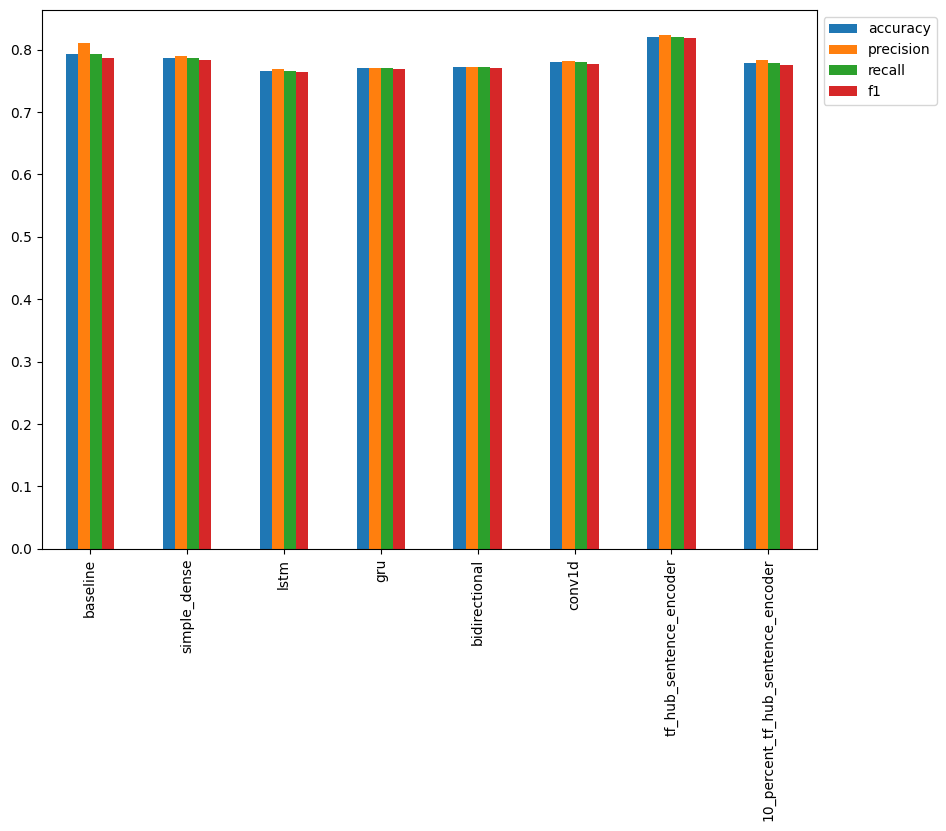

In [134]:
# Giảm accuracy xuống cùng tỷ lệ với các phép đo khác
all_model_results["accuracy"] = all_model_results["accuracy"]/100
# Vẽ và so sánh các kết quả của mô hình
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

## Kết hợp các mô hình (model ensembling/stacking)


In [135]:
# Lấy mean pred probs cho 3 mô hình
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # lấy xác suất dự đoán từ mô hình cơ sở
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # tính trung bình và làm tròn các xác suất dự đoán để có được các lớp dự đoán


In [136]:
# Tính toán kết quả từ việc tính trung bình các xác suất dự đoán
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 78.60892388451444,
 'precision': 0.7858727255673061,
 'recall': 0.7860892388451444,
 'f1': 0.7854867720987249}

In [137]:
# Thêm các kết quả của mô hình kết hợp vào results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [138]:
# Chuyển đổi accuracy sang cùng thang đo với các kết quả còn lại
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

<ipython-input-138-18b0183067b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100


In [139]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.786089,0.790328,0.786089,0.783297
lstm,0.766404,0.768433,0.766404,0.764015
gru,0.770341,0.770121,0.770341,0.769520
bidirectional,0.771654,0.771916,0.771654,0.770400
conv1d,0.779528,0.781951,0.779528,0.777273
tf_hub_sentence_encoder,0.820210,0.822627,0.820210,0.818728
10_percent_tf_hub_sentence_encoder,0.778215,0.783377,0.778215,0.774864
ensemble_results,78.608924,0.785873,0.786089,0.785487


## Tìm những mẫu sai nhất

Chúng ta đã đề cập trước đó rằng nếu nhiều thử nghiệm lập mô hình trả lại các kết quả tương tự, dù sử dụng các loại mô hình khác nhau, thì chúng ta nên xem lại dữ liệu và kiểm tra xem tại sao lại như vậy.

Một trong những cách tốt nhất để kiểm tra dữ liệu là sắp xếp các dự đoán của mô hình và tìm các mẫu mà mô hình đó sai nhiều *nhất*, tức là những dự đoán có xác suất dự đoán cao nhưng hóa ra lại sai.

Vì vậy, hãy trực quan hóa nó ra.

Để mọi thứ trực quan hơn, hãy lấy các lớp và xác suất dự đoán của mô hình hoạt động tốt nhất cùng với các mẫu kiểm định (văn bản và nhãn gốc) và kết hợp chúng vào một pandas DataFrame.

* Nếu mô hình tốt nhất của chúng ta vẫn không hoàn hảo, thì có những mẫu nào bị sai?
* Những mẫu nào sai *nhất*?
* Có nhãn nào bị sai không? Ví dụ: mô hình gán đúng nhưng nhãn gốc không phản ánh được điều này.

In [140]:
# Tạo dataframe với validation sentences và các dự đoán mô hình hoạt động tốt nhất
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.165251
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.725138
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.985946
3,@camilacabello97 Internally and externally scr...,1,0.0,0.188766
4,Radiation emergency #preparedness starts with ...,1,1.0,0.724185


In [141]:
# Tìm các dự đoán sai và sắp xếp theo xác suất dự đoán
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.913378
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.845859
628,@noah_anyname That's where the concentration c...,0,1.0,0.839330
759,FedEx will no longer transport bioterror patho...,0,1.0,0.837035
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.828950
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.820021
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.807115
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.800365
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.791768
567,@RebeccaforReal accepts Wisconsin Emergency Re...,0,1.0,0.764281


In [143]:
# Đưa ra dự đoán trên tập dữ liệu kiểm tra
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # phải là list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 128ms/step
Pred: 1, Prob: 0.7926343679428101
Text:
@RockBottomRadFM Is one of the challenges on Tough Enough rescuing people from burning buildings?

----

1/1 [==============================] - 0s 75ms/step
Pred: 0, Prob: 0.4676586389541626
Text:
kiilud: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.

----

1/1 [==============================] - 0s 77ms/step
Pred: 0, Prob: 0.30314743518829346
Text:
Just woke up to the loudest thunderstorm I've ever heard

----

1/1 [==============================] - 0s 135ms/step
Pred: 0, Prob: 0.09717825055122375
Text:
Lupe know how to rap about social issues and not be boring.  American Terrorist All Black Everything and Little weapon are good examples

----

1/1 [==============================] - 0s 106ms/step
Pred: 0, Prob: 0.1861332356929779
Text:
People are finally panicking about cable TV http://t.co/P49OCqkUTJ

----

1/1 [====

## Dự đoán về Tweets from the wild


In [144]:
# Biến Tweet thành string
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"

In [145]:
def predict_on_sentence(model, sentence):
  """
  Sử dụng mô hình để đưa ra dự đoán về câu.

  Trả về câu, nhãn đã dự đoán và xác suất dự đoán.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [146]:
# Đưa ra dự đoán về Tweet from the wild
predict_on_sentence(model=model_6, # Sử dụng mô hình USE
                    sentence=daniels_tweet)

1/1 [==============================] - 0s 34ms/step
Pred: 0.0 (not real disaster) Prob: 0.04673583805561066
Text:
Life like an ensemble: take the best choices from others and make your own


In [147]:
# Nguồn - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Nguồn - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [148]:
# Dự đoán về Tweet 1: diaster
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 42ms/step
Pred: 1.0 (real disaster) Prob: 0.9583064913749695
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [149]:
# Dự đoán về Tweet 2: diaster
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)

1/1 [==============================] - 0s 35ms/step
Pred: 1.0 (real disaster) Prob: 0.9660882353782654
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


In [150]:
# Tính thời gian dự đoán
import time
def pred_timer(model, samples):
  """
  Thời gian một mô hình đưa ra dự đoán trên các mẫu.

  Đối số:
  ----
  model = mô hình đã huấn luyện
  sample = danh sách các mẫu

  Trả về:
  ----
  total_time = tổng thời gian đã trôi qua để mô hình đưa ra dự đoán trên các mẫu
  time_per_pred = thời gian tính bằng giây cho mỗi mẫu đơn lẻ
  """
  start_time = time.perf_counter() # lấy thời gian bắt đầu
  model.predict(samples) # đưa ra dự đoán
  end_time = time.perf_counter() # get finish time lấy thời gian kết thúc
  total_time = end_time-start_time # tính xem dự đoán mất bao nhiêu thời gian
  time_per_pred = total_time/len(val_sentences) # tìm thời gian dự đoán cho mỗi mẫu
  return total_time, time_per_pred

In [151]:
# Tính thời gian dự đoán của TF Hub Sentence Encoder
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 1s 20ms/step


(0.615104294000048, 0.0008072234829396954)

In [153]:
# Tính thời gian dự đoán của Naive Bayes
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.0421571179995226, 5.532430183664383e-05)

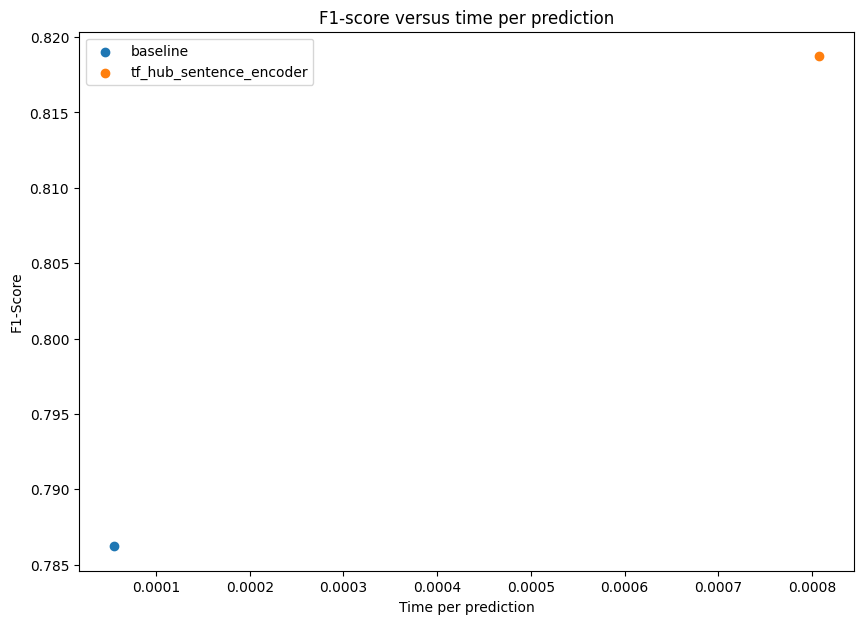

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

## 🛠 Bài tập thực hành
> **Lưu ý:** Các bạn cần làm phần bài tập này để chuẩn bị cho phiên review lab.

1. Xây dựng lại, biên dịch và huấn luyện `model_1`, `model_2` và `model_5` bằng [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) thay vì Functional API.
2. Huấn luyện lại mô hình cơ sở với 10% dữ liệu huấn luyện. Mô hình này hoạt động như thế nào so với mô hình Universal Sentence Encoder với 10% dữ liệu huấn luyện?
3. Thử tinh chỉnh mô hình TF Hub Universal Sentence Encoder bằng cách đặt `training=True` khi khởi tạo nó dưới dạng Keras layer.

```
Chúng ta có thể sử dụng encoding layer thay cho text_vectorizer và embedding layer

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # bật huấn luyện để tinh chỉnh mô hình TensorFlow Hub
```
4. Huấn luyện lại mô hình tốt nhất mà bạn có trên toàn bộ tập huấn luyện (không phân tách kiểm định). Sau đó sử dụng mô hình đã huấn luyện này để đưa ra dự đoán trên tập dữ liệu kiểm tra và định dạng dự đoán sao cho có cùng định dạng với file `sample_submission.csv` từ Kaggle (xem tab Files trên Colab để biết file `sample_submission.csv` trông như thế nào). Sau khi hoàn thành, [hãy gửi tới Kaggle competition](https://www.kaggle.com/c/nlp-getting-started/data), mô hình của bạn hoạt động như thế nào?
5. Kết hợp các dự đoán ensemble bằng cách sử dụng majority vote (mode), điều này hoạt động như thế nào so với tính trung bình xác suất dự đoán của từng mô hình?
6. Tạo confusion matrix với các dự đoán của mô hình hoạt động tốt nhất trên tập kiểm định và các nhãn gốc kiểm định.

In [164]:
# Tạo model_1 với Keras Sequential API
model_1_seq = tf.keras.Sequential([
    text_vectorizer,
    embedding,
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation="sigmoid")
], name="model_1_dense_seq")

# Biên dịch model_1
model_1_seq.compile(loss="binary_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Huấn luyện model_1
model_1_seq_history = model_1_seq.fit(train_sentences,
                                      train_labels,
                                      epochs=5,
                                      validation_data=(val_sentences, val_labels),
                                      callbacks=[create_tensorboard_callback(save_dir, "simple_dense_seq")])


Saving TensorBoard log files to: model_logs/simple_dense_seq/20240729-095152
Epoch 1/5
215/215 [==============================] - 19s 77ms/step - loss: 0.4714 - accuracy: 0.8698 - val_loss: 0.4772 - val_accuracy: 0.7927
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2827 - accuracy: 0.9165 - val_loss: 0.4589 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 4s 21ms/step - loss: 0.2220 - accuracy: 0.9273 - val_loss: 0.4761 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1890 - accuracy: 0.9387 - val_loss: 0.4979 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1656 - accuracy: 0.9456 - val_loss: 0.5220 - val_accuracy: 0.7861


In [165]:
# Tạo model_2 với Keras Sequential API
model_2_seq = tf.keras.Sequential([
    text_vectorizer,
    model_2_embedding,
    layers.LSTM(64),
    layers.Dense(1, activation="sigmoid")
], name="model_2_LSTM_seq")

# Biên dịch model_2
model_2_seq.compile(loss="binary_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Huấn luyện model_2
model_2_seq_history = model_2_seq.fit(train_sentences,
                                      train_labels,
                                      epochs=5,
                                      validation_data=(val_sentences, val_labels),
                                      callbacks=[create_tensorboard_callback(save_dir, "LSTM_seq")])


Saving TensorBoard log files to: model_logs/LSTM_seq/20240729-095316
Epoch 1/5
215/215 [==============================] - 11s 37ms/step - loss: 0.1959 - accuracy: 0.9242 - val_loss: 0.6547 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0890 - accuracy: 0.9651 - val_loss: 1.0623 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0645 - accuracy: 0.9734 - val_loss: 1.3341 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0629 - accuracy: 0.9729 - val_loss: 1.1749 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0606 - accuracy: 0.9746 - val_loss: 1.1415 - val_accuracy: 0.7546


In [166]:
# Tạo model_5 với Keras Sequential API
model_5_seq = tf.keras.Sequential([
    text_vectorizer,
    model_5_embedding,
    layers.Conv1D(filters=32, kernel_size=5, activation="relu"),
    layers.GlobalMaxPool1D(),
    layers.Dense(1, activation="sigmoid")
], name="model_5_Conv1D_seq")

# Biên dịch model_5
model_5_seq.compile(loss="binary_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Huấn luyện model_5
model_5_seq_history = model_5_seq.fit(train_sentences,
                                      train_labels,
                                      epochs=5,
                                      validation_data=(val_sentences, val_labels),
                                      callbacks=[create_tensorboard_callback(save_dir, "Conv1D_seq")])


Saving TensorBoard log files to: model_logs/Conv1D_seq/20240729-095338
Epoch 1/5
215/215 [==============================] - 8s 30ms/step - loss: 0.2322 - accuracy: 0.9349 - val_loss: 0.6009 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0978 - accuracy: 0.9676 - val_loss: 0.6954 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0729 - accuracy: 0.9755 - val_loss: 0.7624 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0629 - accuracy: 0.9766 - val_loss: 0.8088 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0561 - accuracy: 0.9787 - val_loss: 0.8298 - val_accuracy: 0.7717


In [167]:
# Huấn luyện model_0 với 10% dữ liệu
model_0_10_percent = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0_10_percent.fit(train_sentences_10_percent, train_labels_10_percent)

baseline_10_percent_preds = model_0_10_percent.predict(val_sentences)
baseline_10_percent_results = calculate_results(val_labels, baseline_10_percent_preds)
baseline_10_percent_results

{'accuracy': 70.60367454068242,
 'precision': 0.7777273287601192,
 'recall': 0.7060367454068242,
 'f1': 0.6747604694140249}

In [169]:
# Tạo sentence encoder layer với trainable=True
sentence_encoder_layer_trainable = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                                  input_shape=[],
                                                  dtype=tf.string,
                                                  trainable=True,
                                                  name="USE_trainable")

# Tạo model_6 với trainable USE
model_6_trainable = tf.keras.Sequential([
    sentence_encoder_layer_trainable,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE_trainable")

# Biên dịch model_6_trainable
model_6_trainable.compile(loss="binary_crossentropy",
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["accuracy"])

# Huấn luyện model_6_trainable
model_6_trainable_history = model_6_trainable.fit(train_sentences,
                                                  train_labels,
                                                  epochs=5,
                                                  validation_data=(val_sentences, val_labels),
                                                  callbacks=[create_tensorboard_callback(save_dir, "tf_hub_sentence_encoder_trainable")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_trainable/20240729-095459
Epoch 1/5
215/215 [==============================] - 143s 469ms/step - loss: 0.4491 - accuracy: 0.8044 - val_loss: 0.4387 - val_accuracy: 0.8150
Epoch 2/5
215/215 [==============================] - 27s 124ms/step - loss: 0.2401 - accuracy: 0.9085 - val_loss: 0.5498 - val_accuracy: 0.7979
Epoch 3/5
215/215 [==============================] - 25s 119ms/step - loss: 0.0806 - accuracy: 0.9718 - val_loss: 0.5630 - val_accuracy: 0.8084
Epoch 4/5
215/215 [==============================] - 24s 113ms/step - loss: 0.0426 - accuracy: 0.9851 - val_loss: 0.6816 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 23s 106ms/step - loss: 0.0274 - accuracy: 0.9885 - val_loss: 0.6579 - val_accuracy: 0.8110


In [170]:
# Huấn luyện lại model_6 với toàn bộ tập huấn luyện
model_6_full_data = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE_full_data")

# Biên dịch model_6_full_data
model_6_full_data.compile(loss="binary_crossentropy",
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["accuracy"])

# Huấn luyện model_6_full_data
model_6_full_data_history = model_6_full_data.fit(train_sentences,
                                                  train_labels,
                                                  epochs=5,
                                                  validation_data=(val_sentences, val_labels),
                                                  callbacks=[create_tensorboard_callback(save_dir, "tf_hub_sentence_encoder_full_data")])

# Dự đoán trên tập kiểm tra
test_pred_probs = model_6_full_data.predict(test_sentences)
test_preds = tf.squeeze(tf.round(test_pred_probs))

# Định dạng dự đoán theo file sample_submission.csv
submission = pd.DataFrame({"id": test_df["id"], "target": test_preds})
submission.to_csv("submission.csv", index=False)


Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_full_data/20240729-095945
Epoch 1/5
215/215 [==============================] - 6s 20ms/step - loss: 0.5023 - accuracy: 0.7876 - val_loss: 0.4494 - val_accuracy: 0.8045
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4152 - accuracy: 0.8143 - val_loss: 0.4381 - val_accuracy: 0.8150
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4009 - accuracy: 0.8224 - val_loss: 0.4340 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3939 - accuracy: 0.8264 - val_loss: 0.4294 - val_accuracy: 0.8136
Epoch 5/5
102/102 [==============================] - 1s 9ms/step


In [171]:
from scipy.stats import mode

# Lấy các dự đoán của các mô hình
model_1_preds = model_1_seq.predict(val_sentences)
model_2_preds = model_2_seq.predict(val_sentences)
model_5_preds = model_5_seq.predict(val_sentences)

# Chuyển đổi các xác suất dự đoán thành các lớp
model_1_preds = tf.round(model_1_preds)
model_2_preds = tf.round(model_2_preds)
model_5_preds = tf.round(model_5_preds)

# Kết hợp các dự đoán bằng majority vote
ensemble_preds = mode(np.array([model_1_preds, model_2_preds, model_5_preds]), axis=0)[0]
ensemble_preds = tf.squeeze(ensemble_preds)

# Tính toán các kết quả của mô hình ensemble
ensemble_results_mode = calculate_results(val_labels, ensemble_preds)
ensemble_results_mode


24/24 [==============================] - 0s 2ms/step


{'accuracy': 78.08398950131233,
 'precision': 0.7841274438015813,
 'recall': 0.7808398950131233,
 'f1': 0.7782630349987989}

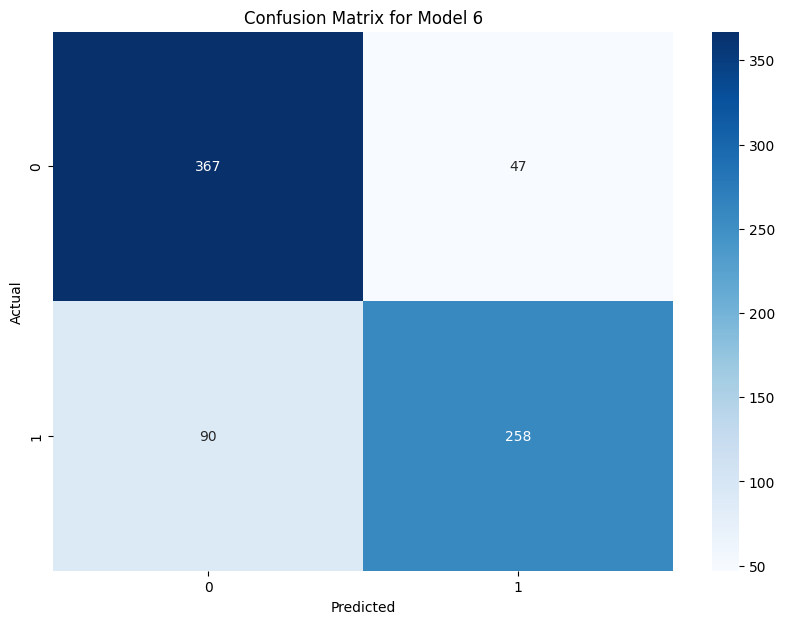

In [172]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tạo confusion matrix
conf_matrix = confusion_matrix(val_labels, model_6_preds)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Model 6')
plt.show()
